### Step-1: Business Probelm Understandig

To predict the fare amount of a taxi trip based on various influencing factors such as distance, time of day, traffic conditions, number of passengers, weather, and trip duration.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Step-2: Extract
- Extact the raw data
- Data understanding
- Data Exploration

**Load the data & understand the every variable**

In [2]:
df = pd.read_csv("taxi_trip_pricing.csv")
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


**Dataset Understanding**

In [3]:
df.shape

(1000, 11)

In [4]:
df.columns.tolist()

['Trip_Distance_km',
 'Time_of_Day',
 'Day_of_Week',
 'Passenger_Count',
 'Traffic_Conditions',
 'Weather',
 'Base_Fare',
 'Per_Km_Rate',
 'Per_Minute_Rate',
 'Trip_Duration_Minutes',
 'Trip_Price']

- Here the observation is no extra space in the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


**The observation is:**
- Total 1000 rows and 11 columns
- All features have some missing values

In [6]:
df["Time_of_Day"].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night', nan], dtype=object)

- Here missing values are available

In [7]:
df["Time_of_Day"].value_counts()

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

- The observation is more number of records are "Afternoon" and the mode is "Afternoon"

In [8]:
df["Day_of_Week"].unique()

array(['Weekday', 'Weekend', nan], dtype=object)

- Some missing values are available

In [9]:
df["Day_of_Week"].value_counts()

Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64

- The more number of records are "Weekday" and the mode is "Weekday"

In [10]:
df["Passenger_Count"].unique()

array([ 3.,  1.,  4.,  2., nan])

- Some missing values are available 

In [11]:
df["Passenger_Count"].value_counts()

Passenger_Count
3.0    251
2.0    241
1.0    238
4.0    220
Name: count, dtype: int64

- The mode is "3"

In [12]:
df["Traffic_Conditions"].unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

- Some missing values are available

In [13]:
df["Traffic_Conditions"].value_counts()

Traffic_Conditions
Low       397
Medium    371
High      182
Name: count, dtype: int64

- The more number of records are "Low" & the mode is "Low"

In [14]:
df["Weather"].unique()

array(['Clear', nan, 'Rain', 'Snow'], dtype=object)

- Some missing values are available

In [15]:
df["Weather"].value_counts()

Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64

- More number of records are "Clear" & the mode is "Clear"

**Exploratory Data Analysis**

In [16]:
continous = ["Trip_Distance_km","Base_Fare","Per_Km_Rate","Per_Minute_Rate","Trip_Duration_Minutes","Trip_Price"]
discrete = ["Time_of_Day","Day_of_Week","Passenger_Count","Traffic_Conditions","Weather"]

- Here continous and discrete variables are named

In [17]:
df[continous].describe()

,Trip_Distance_km,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,5.000000,2.000000,0.500000,119.840000,332.043689


- Here continous variables are describing for better understanding and see the mean,median,mode and std deviation

In [18]:
df[continous].corr()

,Trip_Distance_km,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
Trip_Distance_km,1.000000,0.032218,-0.017041,-0.025902,-0.022102,0.849123
Base_Fare,0.032218,1.000000,0.003092,-0.019150,0.012035,0.035533
Per_Km_Rate,-0.017041,0.003092,1.000000,0.029241,0.027199,0.275135
Per_Minute_Rate,-0.025902,-0.019150,0.029241,1.000000,-0.024230,0.141226
Trip_Duration_Minutes,-0.022102,0.012035,0.027199,-0.024230,1.000000,0.221211
Trip_Price,0.849123,0.035533,0.275135,0.141226,0.221211,1.000000


- Here check the correlation between independent variable vs independent variable & independent variable vs dependent variable and check the multicolinearity problem

In [19]:
df[continous].skew()

Trip_Distance_km         2.236010
Base_Fare               -0.005149
Per_Km_Rate              0.079206
Per_Minute_Rate          0.058695
Trip_Duration_Minutes    0.017749
Trip_Price               3.732561
dtype: float64

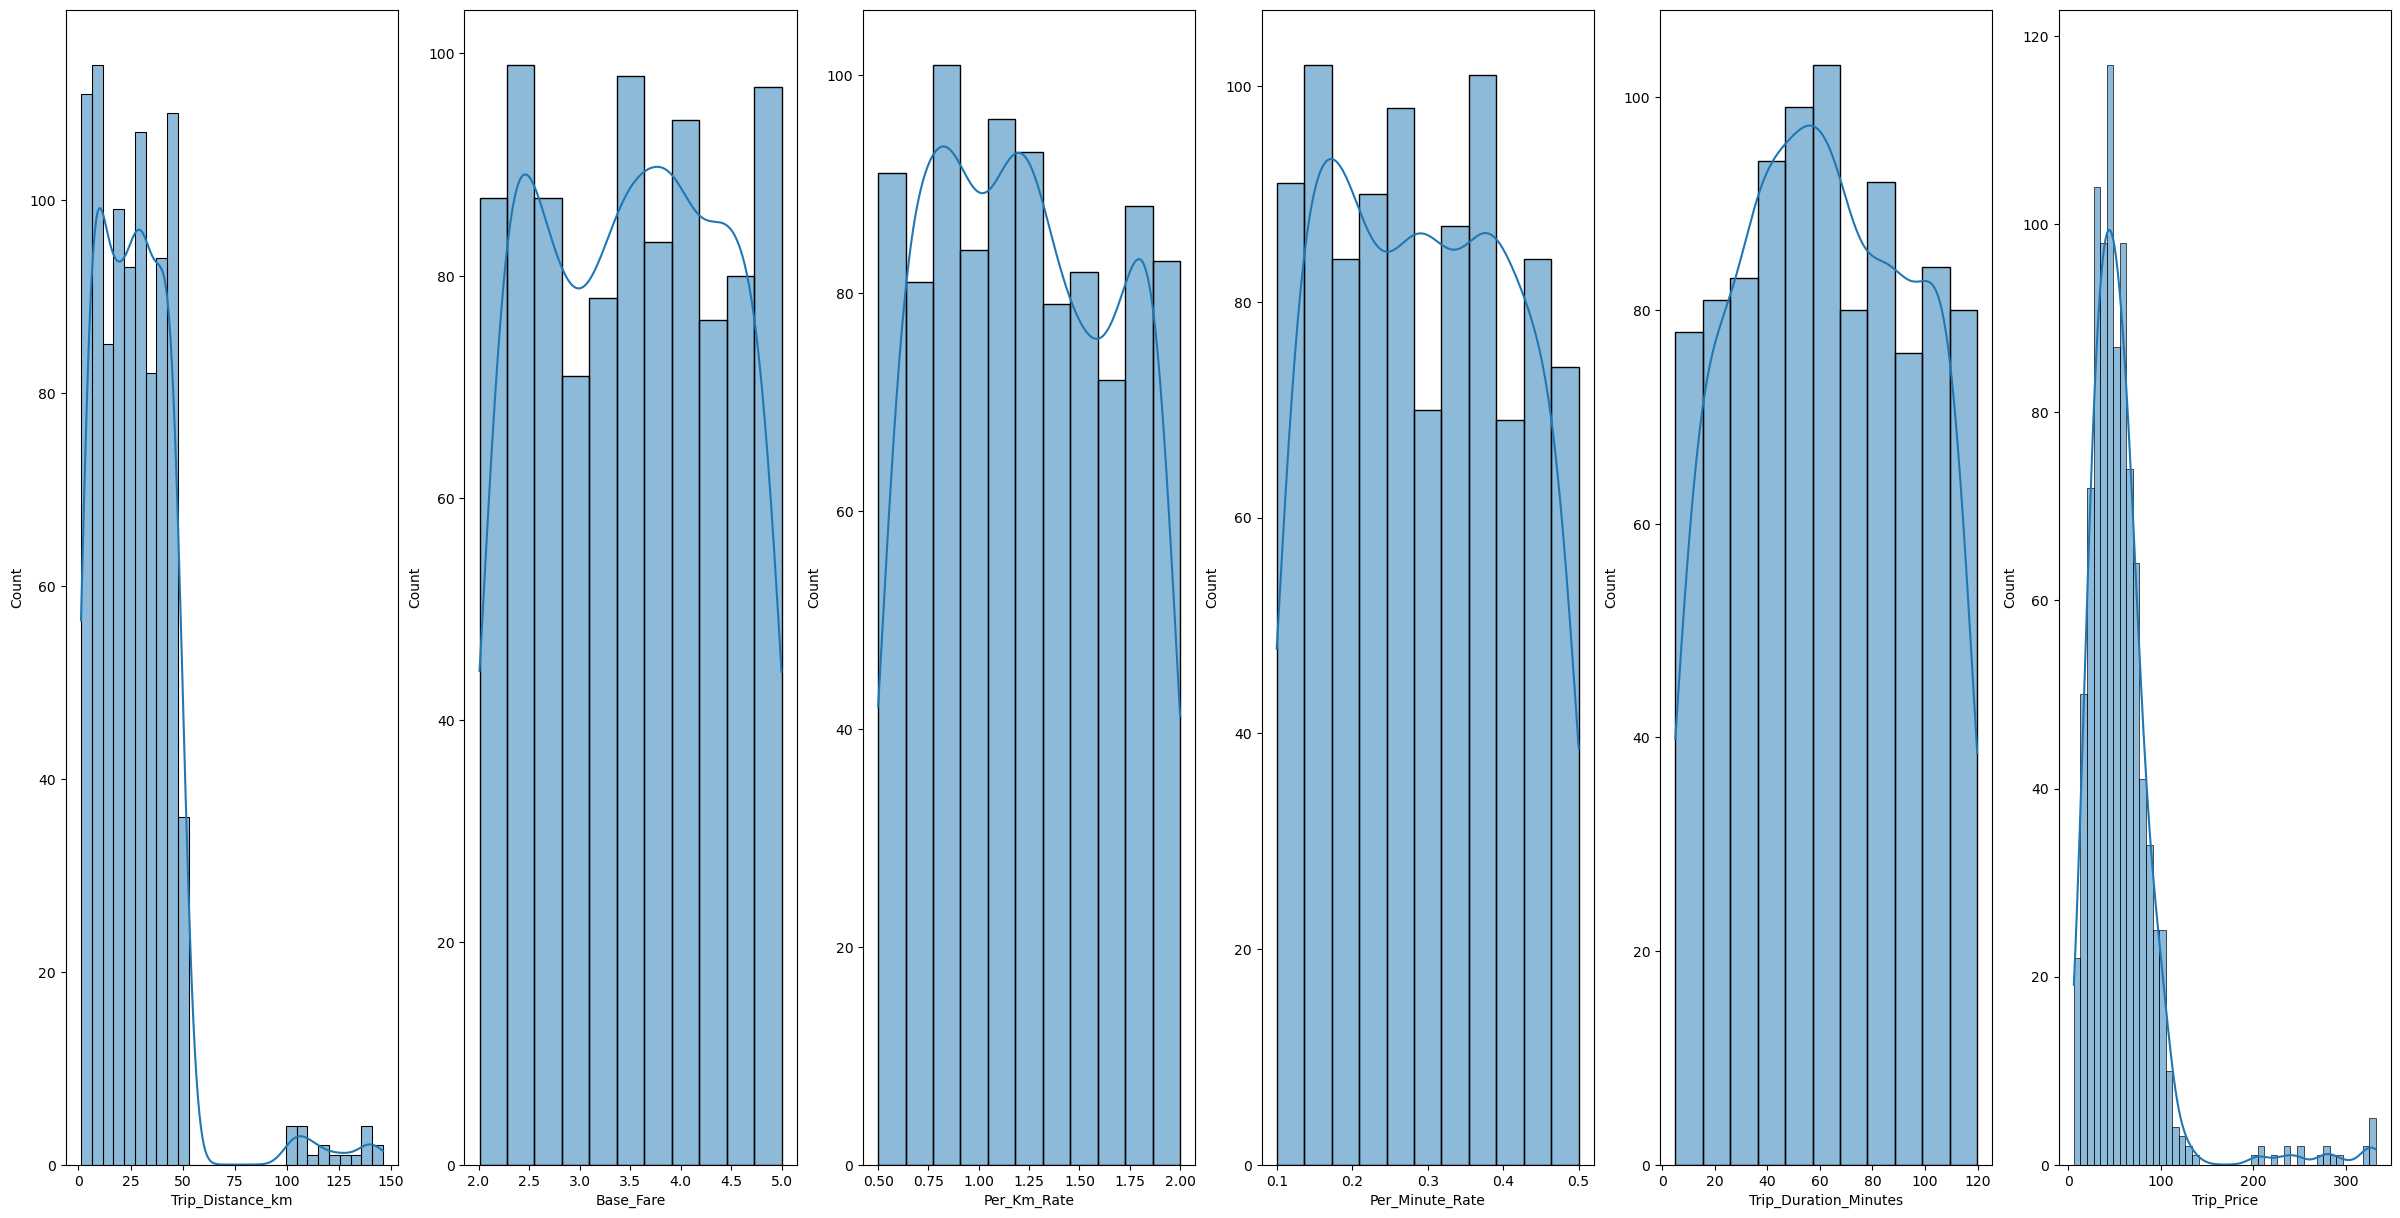

In [20]:
plt.figure(figsize=(30,15))
plt.subplot(1,6,1)
sns.histplot(df["Trip_Distance_km"],kde = True)

plt.subplot(1,6,2)
sns.histplot(df["Base_Fare"],kde = True)

plt.subplot(1,6,3)
sns.histplot(df["Per_Km_Rate"],kde = True)

plt.subplot(1,6,4)
sns.histplot(df["Per_Minute_Rate"],kde = True)

plt.subplot(1,6,5)
sns.histplot(df["Trip_Duration_Minutes"],kde = True)

plt.subplot(1,6,6)
sns.histplot(df["Trip_Price"],kde = True)

plt.show()

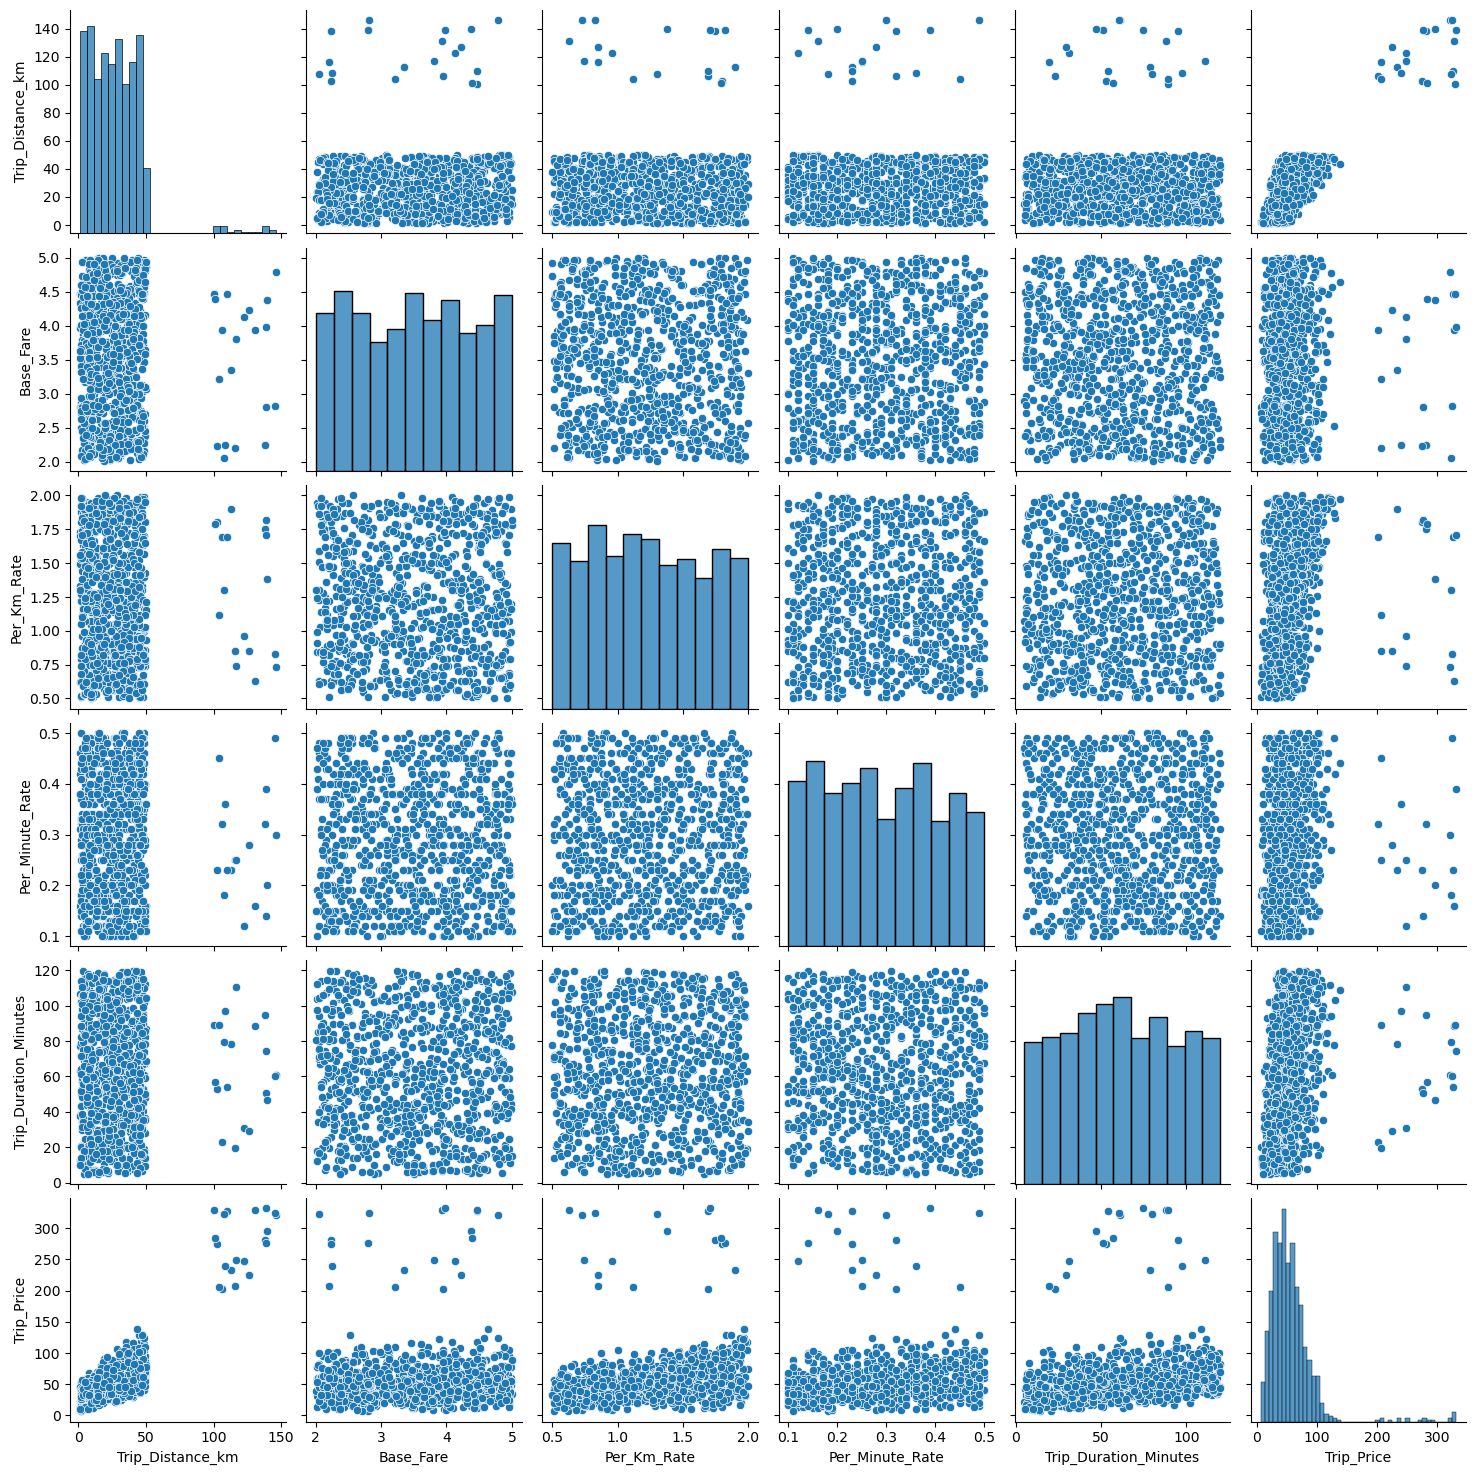

In [21]:
sns.pairplot(df,vars = continous)
plt.show()

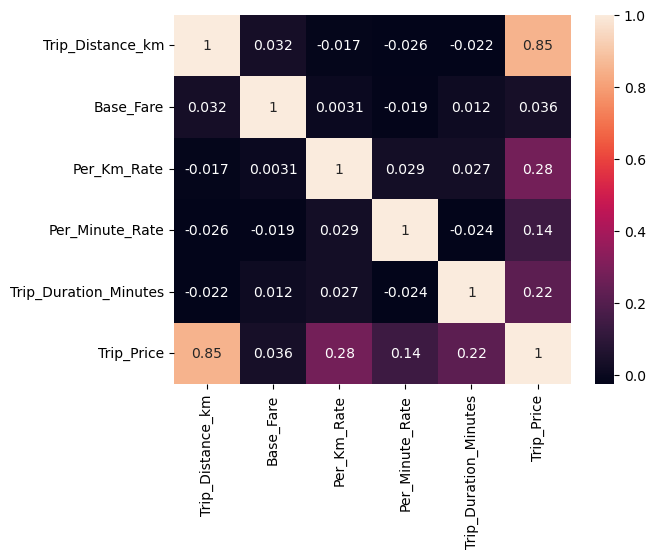

In [22]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

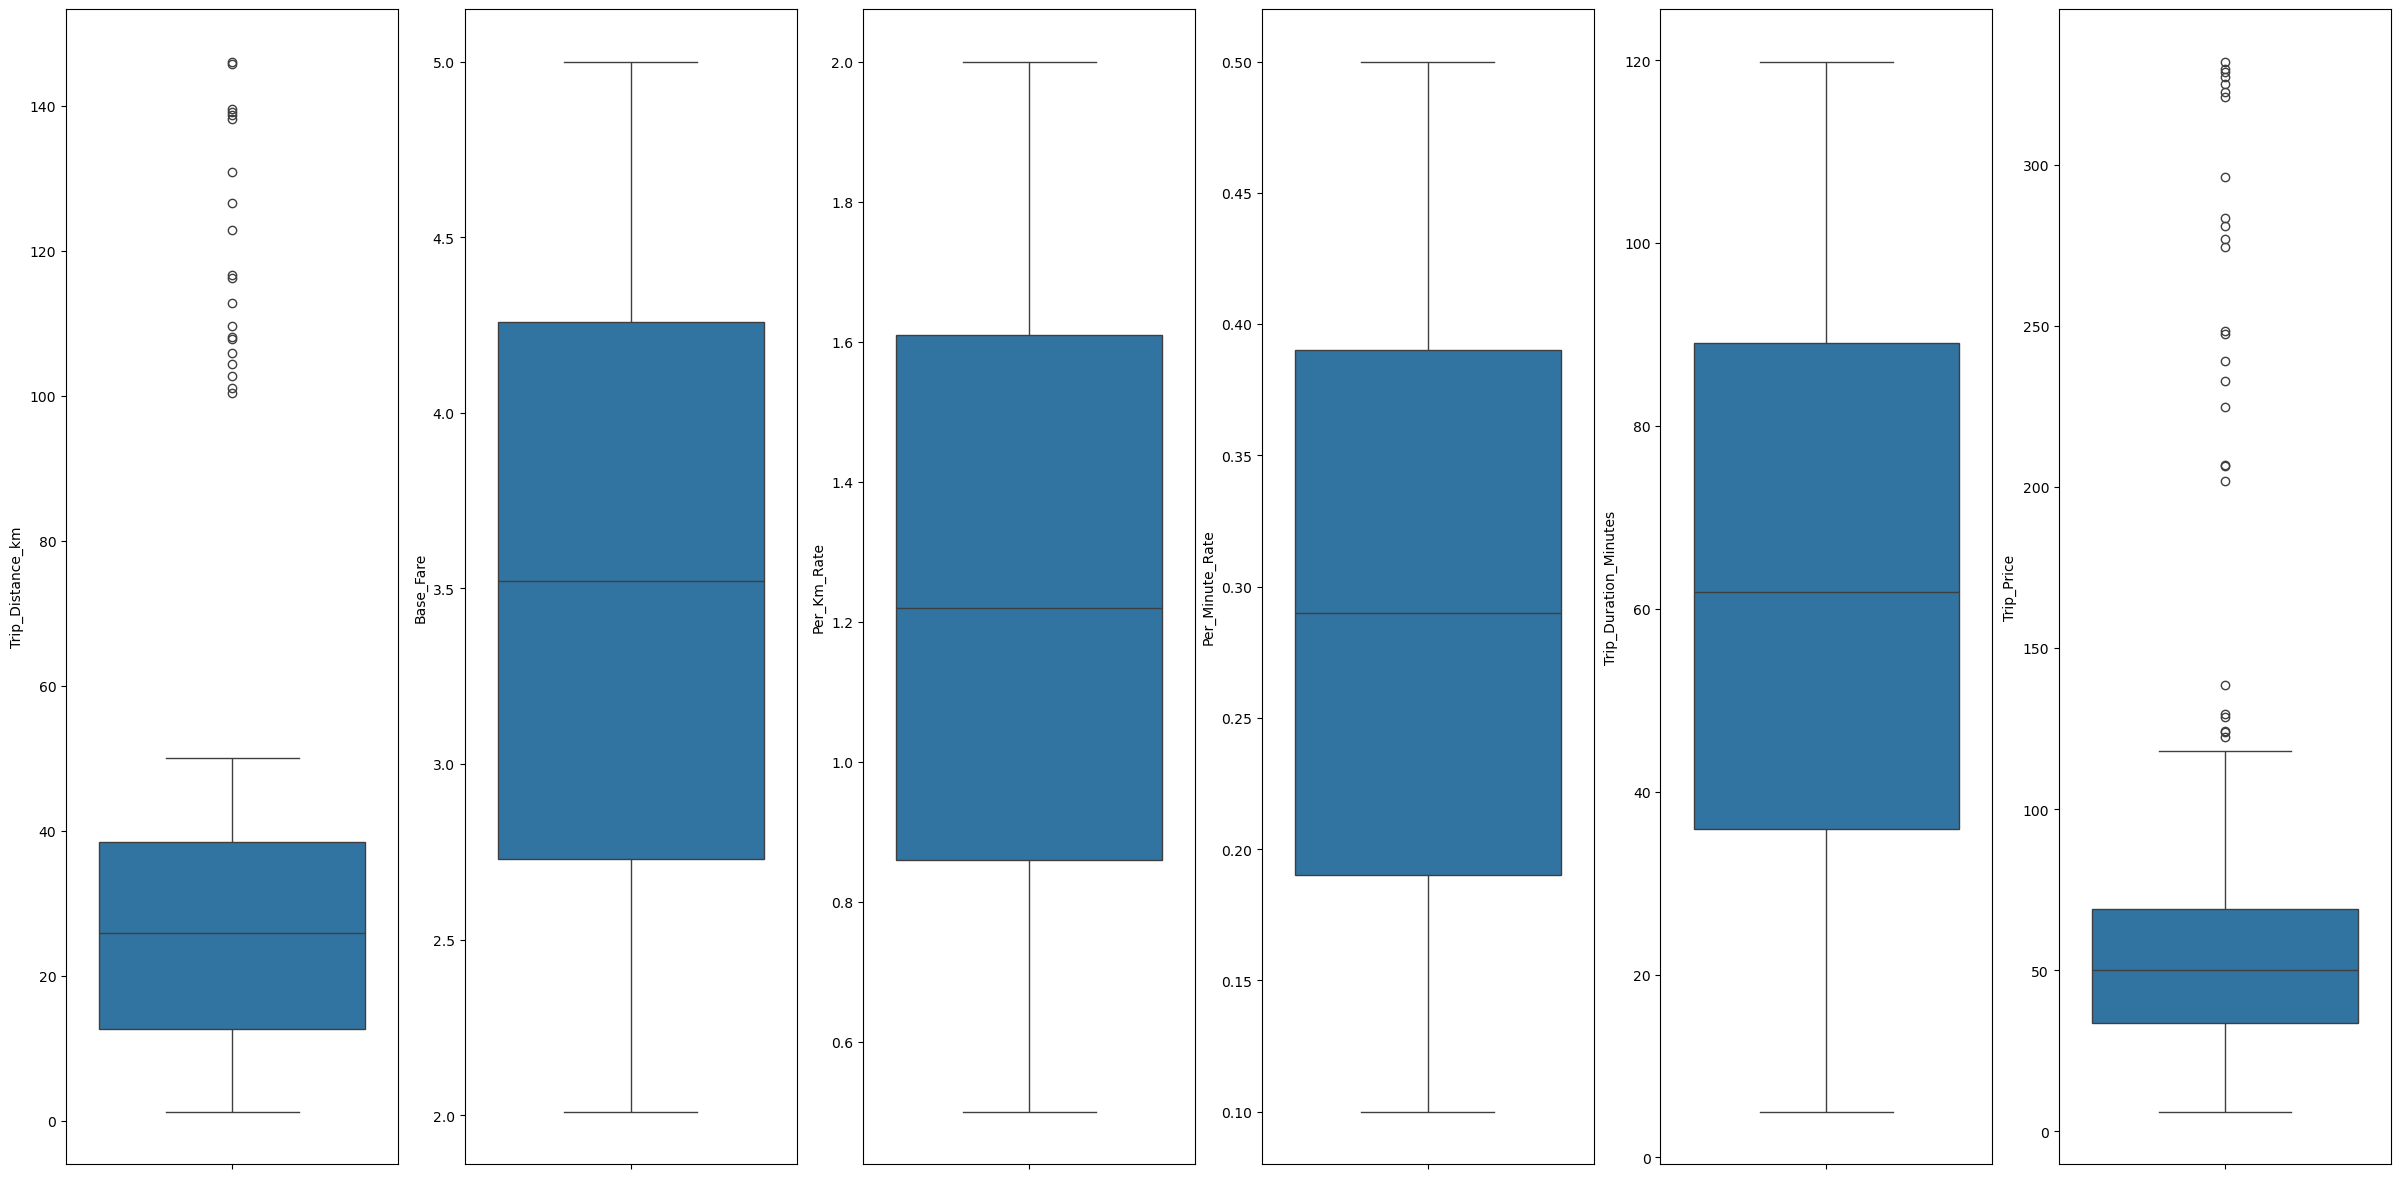

In [23]:
plt.figure(figsize=(30,15))
plt.subplot(1,6,1)
sns.boxplot(df["Trip_Distance_km"])

plt.subplot(1,6,2)
sns.boxplot(df["Base_Fare"])

plt.subplot(1,6,3)
sns.boxplot(df["Per_Km_Rate"])

plt.subplot(1,6,4)
sns.boxplot(df["Per_Minute_Rate"])

plt.subplot(1,6,5)
sns.boxplot(df["Trip_Duration_Minutes"])

plt.subplot(1,6,6)
sns.boxplot(df["Trip_Price"])

plt.show()

# Step-3: Data Preprocessing

In [24]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

- Here the observation is all variables have missing values

In [25]:
df.duplicated().sum()

0

- There is no duplicate values in the dataset

### Data Cleaning

In [26]:
#There is no Wrong data

In [27]:
#There is no wrong data type

In [28]:
#Treat the missing values
df["Time_of_Day"].fillna(df["Time_of_Day"].mode()[0],inplace = True)
df["Day_of_Week"].fillna(df["Day_of_Week"].mode()[0],inplace = True)
df["Weather"].fillna(df["Weather"].mode()[0],inplace = True)
df["Passenger_Count"].fillna(df["Passenger_Count"].mode()[0],inplace = True)
df["Traffic_Conditions"].fillna(df["Traffic_Conditions"].mode()[0],inplace = True)
df["Per_Km_Rate"].fillna(df["Per_Km_Rate"].mean(),inplace = True)
df.dropna(subset = ["Trip_Distance_km","Trip_Duration_Minutes","Trip_Price"],inplace = True)

- Here treat all the missing values by replacing and removing

In [29]:
#There is no Duplicates

In [30]:
#Retrain the outliers

### Feature Selection

In [31]:
#Drop unimportant columns
df.drop(columns = ["Base_Fare","Per_Minute_Rate"],inplace = True)

In [32]:
df.shape

(858, 9)

### Data Wrangling

In [33]:
from scipy.stats import boxcox
df["Trip_Distance_km"],param = boxcox(df["Trip_Distance_km"])
df["Trip_Distance_km"].skew()

-0.0013608455600253484

In [34]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Per_Km_Rate,Trip_Duration_Minutes,Trip_Price
0,5.279810,Morning,Weekday,3.0,Low,Clear,0.800000,53.82,36.2624
2,7.378374,Evening,Weekend,1.0,High,Clear,1.210000,37.27,52.9032
3,6.690839,Evening,Weekday,4.0,Low,Clear,0.510000,116.81,36.4698
5,3.253939,Afternoon,Weekend,2.0,Medium,Clear,1.710000,89.33,60.2028
6,1.733422,Afternoon,Weekday,4.0,High,Rain,1.660000,5.05,11.2645
...,...,...,...,...,...,...,...,...,...
995,2.347067,Afternoon,Weekend,4.0,Medium,Clear,0.620000,58.39,34.4049
996,8.213556,Night,Weekday,4.0,Medium,Clear,0.610000,61.96,62.1295
997,3.009442,Morning,Weekday,3.0,Low,Rain,1.780000,54.18,33.1236
998,8.350267,Morning,Weekday,1.0,Low,Clear,0.820000,114.94,61.2090


In [35]:
df = pd.get_dummies(df,dtype = int,drop_first = True)
df

,Trip_Distance_km,Passenger_Count,Per_Km_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,5.279810,3.0,0.800000,53.82,36.2624,0,1,0,0,1,0,0,0
2,7.378374,1.0,1.210000,37.27,52.9032,1,0,0,1,0,0,0,0
3,6.690839,4.0,0.510000,116.81,36.4698,1,0,0,0,1,0,0,0
5,3.253939,2.0,1.710000,89.33,60.2028,0,0,0,1,0,1,0,0
6,1.733422,4.0,1.660000,5.05,11.2645,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.347067,4.0,0.620000,58.39,34.4049,0,0,0,1,0,1,0,0
996,8.213556,4.0,0.610000,61.96,62.1295,0,0,1,0,0,1,0,0
997,3.009442,3.0,1.780000,54.18,33.1236,0,1,0,0,1,0,1,0
998,8.350267,1.0,0.820000,114.94,61.2090,0,1,0,0,1,0,0,0


- Here encoding all the categorical variable

In [36]:
df.to_excel("Taxi_cleaned.xlsx",index = False)

- Save the cleaned data